# Describing distributions

In [22]:
## Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis

plt.style.use(['dark_background','seaborn-v0_8-pastel'])

In [23]:
df = pd.read_csv('Data\data.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [24]:
## Create a functions to visualize column

def create_graph(df, column_name):
    feature = df[column_name]
    
    mean = feature.mean()
    median = feature.median()
    
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std

    kurt = feature.kurt()
    
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(feature ,ax=ax, stat='probability', kde='True')
    
    ax.axvline(mean, color='red', label=f'Mean = {mean:,.2f}')
    ax.axvline(median, color='green', label=f'Median = {median:,.2f}')

    ax.axvline(plus_one_std, color='black', label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color='black', label = f'-1 std = {minus_one_std:,.2f}')
    
    ax.axvspan(plus_one_std, minus_one_std, color='yellow', zorder=0)

    ax.set_title(f'{column_name}: Kurtosis = {kurt:,.2f}')
    ax.legend();

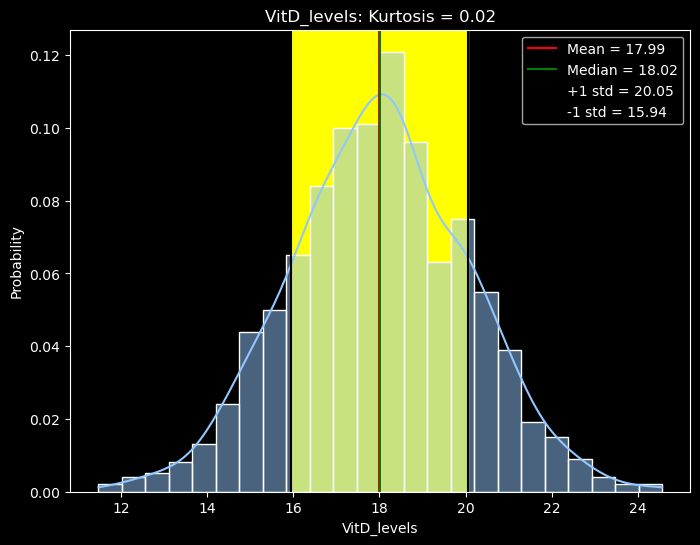

In [25]:
## VitD_levels
create_graph(df, 'VitD_levels')

### Is it Discrete or Continuous?
- This measure is continuous.

### Does it have a skew? If so, which direction (+/-)
- The data seems to be symmetrically distributed.

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
- Kurtosis is approximately 0.
- Mesokurtic.
- Similar kurtosis to a normal distribution, i.e. neither too peaked or too flat.

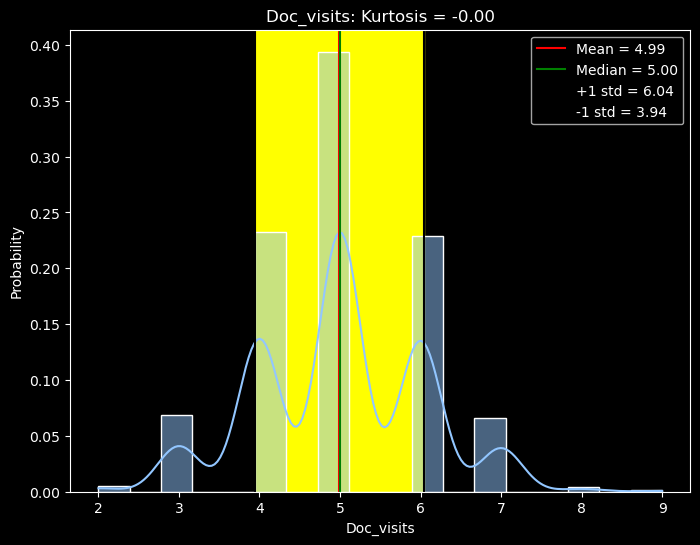

In [26]:
## Doc_visits
create_graph(df, 'Doc_visits')

### Is it Discrete or Continuous?
- This measure is discrete.

### Does it have a skew? If so, which direction (+/-)
- The data seems to be symmetrically distributed.

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
- Kurtosis is approximately 0.
- Mesokurtic.
- Similar kurtosis to a normal distribution, i.e. neither too peaked or too flat.

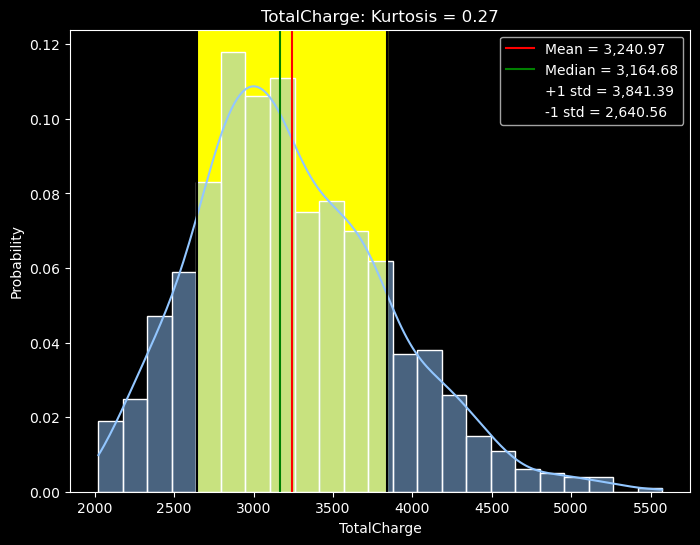

In [27]:
## TotalCharge
create_graph(df, 'TotalCharge')

### Is it Discrete or Continuous?
- This measure is continuous.

### Does it have a skew? If so, which direction (+/-)
- The mean is greater than the median.
- This indicate a right (positive) skew.

### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
- Kurtosis is greater than 0.
- Leptokurtic.
- This indicates a that the distribution has heavier tails and a sharper peak thans a normal distribution.
- More outliers.